# ***Yoga Pose Image Classification***

---
Yoga Pose Image Classification : This project is to classify the name of the yoga (Labels) by viewing the image(Data) of the person performing that particular yoga.

Models will be made by using `Tensorflow`

### Dataset:
Dataset containing images of 107 different yoga's with an average of 50 images per yoga.Model will be training on the 90% of the total images and remaining will be left for validation purpose of the Model.

### Importing libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing the data

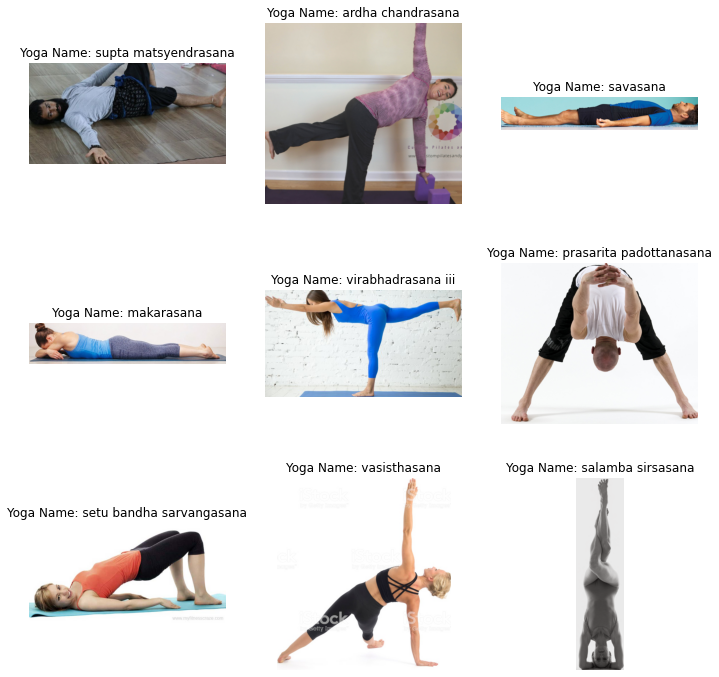

In [ ]:
# visualize random image
from matplotlib.image import imread
import random
import os
yoga_name = os.listdir('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/dataset')

random_image = random.sample(range(0,len(yoga_name)),9)

fig,((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8)) = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches((12,12))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for i in range(0,len(random_image)):
  image_dir = os.listdir('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/dataset/'+yoga_name[random_image[i]])
  img = random.randint(0,len(image_dir)-1)
  ax[i].imshow(imread('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/dataset/'+yoga_name[random_image[i]]+'/'+image_dir[img]))
  ax[i].set_title('Yoga Name: '+yoga_name[random_image[i]])
  ax[i].axis('off')


In [ ]:
# number of images per class
images_per_class= []
for name in yoga_name:
  l1 = os.listdir('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/dataset/'+name)
  images_per_class.append(len(l1))

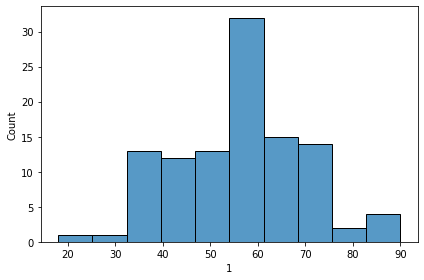

In [ ]:
# number of images per class
df = pd.DataFrame(data=[yoga_name,images_per_class]).transpose()
plt.figure()
sns.histplot(data=df,x=df[1]);
plt.tight_layout()


### Splitting the data into Train and Test directory
Splitting the Data into train and validation data with 90% training data and 10% validation data 

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

splitfolders.ratio("/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/dataset", output="/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting", seed=1337, ratio=(.9, .1), group_prefix=None) # default values


Copying files: 5996 files [25:47,  3.87 files/s]


### Running Different Model Experiments


1.   Model0: Baseline(Conv2D)
2.   Model1: Conv2D with Preprocessing of images
4.   Model2: Tensorflow Hub Pretrained(Feature Extractor) with processed images
5.   Model3: Tensorflow Hub Pretrained(Fine Tuning) with Processed images

### Model0: Baseline(Conv2D)

In [ ]:
### converting images into nummbers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224,224)
batch_size=32

train_dir='/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/train'
test_dir='/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/val'

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(train_dir,target_size=image_size,batch_size=32,class_mode='categorical')

Found 5351 images belonging to 107 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 642 images belonging to 107 classes.


In [ ]:
# creating callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

def model_checkpoint(filepath):
  checkpoint = ModelCheckpoint(filepath,monitor='val_accuracy',save_best_only=True,verbose=1)
  return checkpoint

model_checkpoint_0 = model_checkpoint('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model0.h5')

In [ ]:
## creating model

import tensorflow as tf
from tensorflow.keras import layers

tf.keras.backend.clear_session()
inputs = layers.Input(shape=(224,224,3))

x = layers.Conv2D(256,kernel_size=3,strides=(1,1),activation='relu')(inputs)
x = layers.Conv2D(128,kernel_size=3,activation='relu')(x)
#x = layers.GlobalMaxPool2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(256,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
x = layers.Conv2D(128,kernel_size=3,activation='relu')(x)
#x = layers.GlobalMaxPool2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(256,kernel_size=3,strides=(1,1),activation='relu')(x)
x = layers.Conv2D(128,kernel_size=3,activation='relu')(x)
x = layers.GlobalMaxPool2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(107,activation='softmax')(x)

model_0 = tf.keras.Model(inputs,outputs)


## compiling the model

model_0.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

## summary
model_0.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 128)     295040    
                                                                 
 global_max_pooling2d_2 (Glo  (None, 128)              0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                             

In [ ]:
## fitting the model

model_0.fit(train_data,epochs=20,validation_data=test_data,steps_per_epoch=len(train_data),validation_steps=len(test_data),callbacks=model_checkpoint)

Epoch 1/20
 72/168 [===========>..................] - ETA: 15:17 - loss: 4.6809 - accuracy: 0.0110

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


168/168 [==============================] - 1810s 11s/step - loss: 4.6736 - accuracy: 0.0133 - val_loss: 4.6580 - val_accuracy: 0.0140
Epoch 2/20
168/168 [==============================] - 120s 716ms/step - loss: 4.6590 - accuracy: 0.0138 - val_loss: 4.6523 - val_accuracy: 0.0140
Epoch 3/20
168/168 [==============================] - 119s 709ms/step - loss: 4.6537 - accuracy: 0.0138 - val_loss: 4.6507 - val_accuracy: 0.0156
Epoch 4/20
168/168 [==============================] - 119s 708ms/step - loss: 4.6470 - accuracy: 0.0174 - val_loss: 4.6304 - val_accuracy: 0.0140
Epoch 5/20
168/168 [==============================] - 119s 705ms/step - loss: 4.6042 - accuracy: 0.0234 - val_loss: 4.5332 - val_accuracy: 0.0249
Epoch 6/20
168/168 [==============================] - 119s 708ms/step - loss: 4.5218 - accuracy: 0.0260 - val_loss: 4.4786 - val_accuracy: 0.0358
Epoch 7/20
168/168 [==============================] - 119s 706ms/step - loss: 4.4652 - accuracy: 0.0262 - val_loss: 4.3763 - val_accurac

In [ ]:
## predictions

preds = model_0.predict(test_data)
model_0_predictions = tf.argmax(preds,axis=1)
model_0_predictions[:10]

In [ ]:
y_true = test_data.classes

In [ ]:
### evaluating model
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

def model_evaluation(y_true,y_preds):
  y_preds = np.array(y_preds)
  accuracy = accuracy_score(y_true,y_preds)
  recall = recall_score(y_true,y_preds,average='micro')
  f1 = f1_score(y_true,y_preds,average='micro')
  precision = precision_score(y_true,y_preds,average='micro')
  dict1 = {'accuracy':accuracy,
           'recall':recall,
           'f1':f1,
           'precision':precision}

  return dict1

In [ ]:
model_evaluation(y_true,model_0_predictions)

### Model1:Conv2D with Preprocessing of images

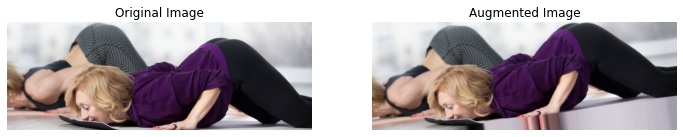

In [ ]:
### processing the images 

# using image data generator
train_datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.1,
                                    zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')

## plotting the augmented image

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((12,5))
ax1.imshow(imread('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/train/ashtanga namaskara/17-0.png'))
ax1.set_title('Original Image')
ax1.axis('off')


ax2.imshow(train_datagen.random_transform(imread('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/train/ashtanga namaskara/17-0.png')))
ax2.set_title('Augmented Image')
ax2.axis('off');

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/train',target_size=(224,224),
                                               batch_size=32,class_mode='categorical')

Found 5351 images belonging to 107 classes.


In [ ]:
test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/val',target_size=(224,224),
                                             batch_size=32,class_mode='categorical')

Found 642 images belonging to 107 classes.


In [ ]:
### creating callbacks

model_checkpoint_1 = model_checkpoint('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model1.h5')

In [ ]:
## creating model

import tensorflow as tf
from tensorflow.keras import layers

tf.keras.backend.clear_session()
inputs = layers.Input(shape=(224,224,3))

x = layers.Conv2D(512,kernel_size=3,strides=(1,1),activation='relu')(inputs)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(512,kernel_size=(3,3),strides=(1,1),activation='relu')(inputs)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(512,kernel_size=3,strides=(1,1),activation='relu')(inputs)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Conv2D(512,kernel_size=3,strides=(1,1),activation='relu')(inputs)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.GlobalAvgPool2D()(x)
x = layers.Dropout(0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512,activation='relu')(x)
x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(107,activation='softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)


## compiling the model

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

## summary
model_1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 512)     14336     
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 256)     1179904   
                                                                 
 global_average_pooling2d_3   (None, 256)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                             

In [ ]:
## fitting the data 
model_1_history = model_1.fit(train_data,epochs=20,validation_data=test_data,validation_steps=int(0.1*len(test_data)),callbacks=[model_checkpoint_1])

Epoch 1/20
160/168 [===========================>..] - ETA: 3:15 - loss: 4.6729 - accuracy: 0.0106

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


168/168 [==============================] - ETA: 0s - loss: 4.6724 - accuracy: 0.0107 
Epoch 1: val_accuracy improved from -inf to 0.01562, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model1.h5
168/168 [==============================] - 4242s 25s/step - loss: 4.6724 - accuracy: 0.0107 - val_loss: 4.6695 - val_accuracy: 0.0156
Epoch 2/20
168/168 [==============================] - ETA: 0s - loss: 4.6618 - accuracy: 0.0148
Epoch 2: val_accuracy did not improve from 0.01562
168/168 [==============================] - 363s 2s/step - loss: 4.6618 - accuracy: 0.0148 - val_loss: 4.6488 - val_accuracy: 0.0156
Epoch 3/20
168/168 [==============================] - ETA: 0s - loss: 4.6525 - accuracy: 0.0148
Epoch 3: val_accuracy improved from 0.01562 to 0.04688, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model1.h5
168/168 [==============================] - 366s 2s/step - loss: 4.6525 - accuracy: 0.0148 - val_loss: 4.6261 - val_accur

In [ ]:
 model_1 = tf.keras.models.load_model('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model1.h5')

In [ ]:
preds = model_1.predict(test_data)
model_1_predictions = tf.argmax(preds,axis=1)
model_1_predictions[:10]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([89, 76, 76, 89, 89, 89, 89, 21, 21, 89])>

In [ ]:
model_evaluation(y_true,model_1_predictions)

{'accuracy': 0.00778816199376947,
 'f1': 0.00778816199376947,
 'precision': 0.00778816199376947,
 'recall': 0.00778816199376947}

In [ ]:
### visualizing the predicted random image

import random
import os

def random_prediction_image(y_true,test_data,predictions):
  y_class = list(test_data.class_indices.keys())
  test_dir = os.listdir('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/val')
  image = random.sample(range(0,len(test_dir)),9)

  fig,((ax0,ax1,ax2),(ax3,ax4,ax5),(ax6,ax7,ax8))=plt.subplots(nrows=3,ncols=3)
  ax=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
  fig.set_size_inches((12,12))

  for i in range(0,9):
    image_dir = os.listdir('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/val/'+test_dir[image[i]])
    random_image = random.randint(0,len(image_dir)-1)
    ax[i].imshow(imread('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/val/'+test_dir[image[i]]+'/'+image_dir[random_image]))
    ax[i].axis('off')
    if y_true[random_image]==predictions[random_image]:
      ax[i].set_title('Original: '+y_class[image[i]]+'\nPredicted: '+test_dir[image[i]],color='green')
    else:
      ax[i].set_title('Original: '+y_class[image[i]]+'\nPredicted: '+test_dir[image[i]],color='red')


In [ ]:
random_prediction_image(y_true,test_data,model_1_predictions)

### Model2: Tensorflow Hub Pretrained(Feature Extractor) with processed images

Using `EfficientNet B0` from the Tensorflow Hub as our Pretrained Feature Extractor https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [ ]:
## training data
image_data_gen = ImageDataGenerator(rescale=1/255)

train_data = image_data_gen.flow_from_directory('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/train',class_mode='categorical',
                                                batch_size=32,target_size=[224,224])

Found 5351 images belonging to 107 classes.


In [ ]:
test_data = image_data_gen.flow_from_directory('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/val',class_mode='categorical',
                                                batch_size=32,target_size=[224,224])

Found 642 images belonging to 107 classes.


In [ ]:
## creating data augmentation layer
data_augmentation = tf.keras.Sequential([
                                         layers.experimental.preprocessing.RandomFlip('horizontal'),
                                         layers.experimental.preprocessing.RandomRotation(0.2),
                                         layers.experimental.preprocessing.RandomZoom(0.2),
                                         layers.experimental.preprocessing.RandomHeight(0.2),
                                         layers.experimental.preprocessing.RandomWidth(0.2),
                                         #layers.experimental.preprocessing.Rescaling(1/255)
])

In [ ]:
## creating feature extractor layer
import tensorflow_hub as hub

feature_extractor_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1',trainable=False,input_shape=[224,24,3])


In [ ]:
## creating model

inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)

x = feature_extractor_layer(x)

outputs = layers.Dense(107,activation='softmax')(x)
model_2b = tf.keras.Model(inputs,outputs)

# compiling
model_2b.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

## summary
model_2b.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense_4 (Dense)             (None, 107)               137067    
                                                                 
Total params: 4,186,631
Trainable params: 137,067
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
# creating callback
model_checkpoint_2b = model_checkpoint('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model2b.h5')

In [ ]:
#fitting the data
model_2b.fit(train_data,validation_data=test_data,epochs=10,validation_steps=int(0.25*len(test_data)),callbacks=[model_checkpoint_2b])

Epoch 1/10
 69/168 [===========>..................] - ETA: 7:56 - loss: 4.5133 - accuracy: 0.0444

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


168/168 [==============================] - ETA: 0s - loss: 4.1821 - accuracy: 0.0946
Epoch 1: val_accuracy improved from -inf to 0.19375, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model2b.h5
168/168 [==============================] - 780s 5s/step - loss: 4.1821 - accuracy: 0.0946 - val_loss: 3.5149 - val_accuracy: 0.1937
Epoch 2/10
168/168 [==============================] - ETA: 0s - loss: 3.2782 - accuracy: 0.2674
Epoch 2: val_accuracy improved from 0.19375 to 0.25625, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model2b.h5
168/168 [==============================] - 75s 446ms/step - loss: 3.2782 - accuracy: 0.2674 - val_loss: 2.9826 - val_accuracy: 0.2562
Epoch 3/10
168/168 [==============================] - ETA: 0s - loss: 2.7968 - accuracy: 0.3691
Epoch 3: val_accuracy improved from 0.25625 to 0.35000, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model2b.h5
168/168 [================

In [ ]:
#fitting the data for 10 more epochs
model_2b.fit(train_data,validation_data=test_data,epochs=10,validation_steps=int(0.25*len(test_data)),callbacks=[model_checkpoint_2b])

Epoch 1/10
114/168 [===================>..........] - ETA: 15s - loss: 1.5353 - accuracy: 0.6475

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


168/168 [==============================] - ETA: 0s - loss: 1.5226 - accuracy: 0.6503
Epoch 1: val_accuracy did not improve from 0.50625
168/168 [==============================] - 48s 284ms/step - loss: 1.5226 - accuracy: 0.6503 - val_loss: 2.1944 - val_accuracy: 0.4313
Epoch 2/10
168/168 [==============================] - ETA: 0s - loss: 1.4601 - accuracy: 0.6593
Epoch 2: val_accuracy did not improve from 0.50625
168/168 [==============================] - 43s 253ms/step - loss: 1.4601 - accuracy: 0.6593 - val_loss: 2.2588 - val_accuracy: 0.4125
Epoch 3/10
168/168 [==============================] - ETA: 0s - loss: 1.3915 - accuracy: 0.6700
Epoch 3: val_accuracy did not improve from 0.50625
168/168 [==============================] - 43s 252ms/step - loss: 1.3915 - accuracy: 0.6700 - val_loss: 2.0931 - val_accuracy: 0.4437
Epoch 4/10
168/168 [==============================] - ETA: 0s - loss: 1.3129 - accuracy: 0.6963
Epoch 4: val_accuracy improved from 0.50625 to 0.53750, saving model to 

In [ ]:
model_2 = tf.keras.models.load_model('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model2b.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model_2.evaluate(test_data)

 4/21 [====>.........................] - ETA: 1:55 - loss: 2.0719 - accuracy: 0.4375

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/21 [==============================] - 128s 6s/step - loss: 2.1318 - accuracy: 0.4829


[2.1317572593688965, 0.4828660488128662]

In [ ]:
y_preds = model_2.predict(test_data)
model_2_predictions = tf.argmax(y_preds,axis=1)
model_2_predictions[:10]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([13, 10,  3, 86, 14, 31, 56, 21, 64, 22])>

In [ ]:
model_evaluation(y_true,model_2_predictions)

{'accuracy': 0.010903426791277258,
 'f1': 0.010903426791277258,
 'precision': 0.010903426791277258,
 'recall': 0.010903426791277258}

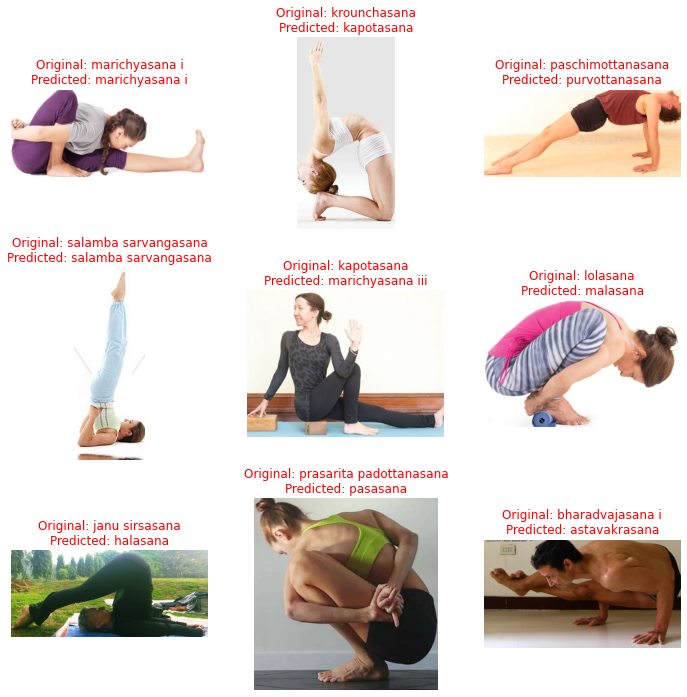

In [ ]:
random_prediction_image(y_true,test_data,model_2_predictions)

### Model3: Tensorflow Hub Pretrained(Fine Tuning) with Processed images

In [ ]:
## creating data

image_data_gen = ImageDataGenerator(rescale=1/255)

train_data = image_data_gen.flow_from_directory('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/train',class_mode='categorical',
                                                batch_size=32,target_size=(224,224))

Found 5351 images belonging to 107 classes.


In [ ]:
test_data = image_data_gen.flow_from_directory('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/data_after_splitting/val',class_mode='categorical',
                                                batch_size=32,target_size=(224,224),shuffle=False)

Found 642 images belonging to 107 classes.


In [ ]:
## creating data augmentation layer
import tensorflow as tf
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
                                         layers.experimental.preprocessing.RandomFlip('horizontal'),
                                         layers.experimental.preprocessing.RandomRotation(0.2),
                                         layers.experimental.preprocessing.RandomZoom(0.2),
                                         layers.experimental.preprocessing.RandomHeight(0.2),
                                         layers.experimental.preprocessing.RandomWidth(0.2),
                                         #layers.experimental.preprocessing.Rescaling(1/255)
])

In [ ]:
## creating feature extractor layer

import tensorflow_hub as hub

feature_extractor_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1',trainable=True,input_shape=[224,24,3])

In [ ]:
## creating the model

inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = feature_extractor_layer(x)

outputs = layers.Dense(107,activation='softmax')(x)
model_3 = tf.keras.Model(inputs,outputs)

## compiling
model_3.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

## model summary
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense_6 (Dense)             (None, 107)               137067    
                                                                 
Total params: 4,186,631
Trainable params: 4,144,615
Non-trainable params: 42,016
_________________________________________________________________


In [ ]:
## creating call backs
model_checkpoint_3 = model_checkpoint('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model3b.h5')

In [ ]:
## fitting the model

model_3.fit(train_data,validation_data=test_data,epochs=20,validation_steps=int(0.25*len(test_data)),callbacks=[model_checkpoint_3])

Epoch 1/20
 10/168 [>.............................] - ETA: 24:08 - loss: 4.8298 - accuracy: 0.0305

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


168/168 [==============================] - ETA: 0s - loss: 3.5186 - accuracy: 0.2173 
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model3b.h5
168/168 [==============================] - 1743s 10s/step - loss: 3.5186 - accuracy: 0.2173 - val_loss: 2.1592 - val_accuracy: 0.4375
Epoch 2/20
168/168 [==============================] - ETA: 0s - loss: 1.9360 - accuracy: 0.4977
Epoch 2: val_accuracy improved from 0.43750 to 0.55625, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model3b.h5
168/168 [==============================] - 1623s 10s/step - loss: 1.9360 - accuracy: 0.4977 - val_loss: 1.8164 - val_accuracy: 0.5562
Epoch 3/20
168/168 [==============================] - ETA: 0s - loss: 1.4579 - accuracy: 0.6178
Epoch 3: val_accuracy improved from 0.55625 to 0.62500, saving model to /content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model3b.h5
168/168 [=============

In [ ]:
model_3 = tf.keras.models.load_model('/content/drive/MyDrive/data/Yoga_Pose_Detection/archive/Model/model3b.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model_3.evaluate(test_data)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


21/21 [==============================] - 409s 20s/step - loss: 1.5010 - accuracy: 0.6573


[1.5010098218917847, 0.6573208570480347]

In [ ]:
preds = model_3.predict(test_data)
model_3_predictions = tf.argmax(preds,axis=1)
model_3_predictions[:10]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 9, 0, 0, 0, 0, 1, 1, 1])>

In [ ]:
model_evaluation(y_true,model_3_predictions)

{'accuracy': 0.6573208722741433,
 'f1': 0.6573208722741433,
 'precision': 0.6573208722741433,
 'recall': 0.6573208722741433}

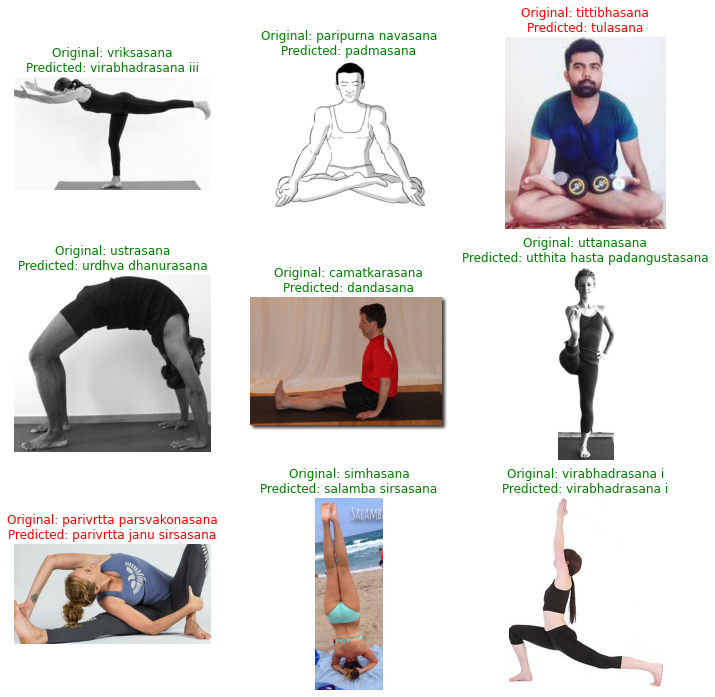

In [ ]:
random_prediction_image(y_true,test_data,model_3_predictions)